In [1]:
# Licensed under the Apache License, Version 2.0 (the "License"); you may not use this library except in compliance with the License.
# You may obtain a copy of the License at

# [www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

# Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

# 1. Data Preprocessing

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# URL of the CSV file
url = "https://github.com/shindesagarm/Ethically_Responsible_Machine_Learning_in_Fintech/blob/main/explainability_notebook/cc_dataset.csv?raw=true"

# Read the CSV file into a DataFrame
df = pd.read_csv(url)

## Data Loading

In [7]:
# Read the data file
dataset = pd.read_csv(url)
# Replace "?" with NaN
dataset.replace('?', np.NaN, inplace = True)
# Convert Age to numeric
dataset["Age"] = pd.to_numeric(dataset["Age"])
# dataset2 = dataset[:,:]
dataset2 = dataset.copy()

NameError: name 'pd' is not defined

In [4]:
dataset.describe()

,Age,Debt,YearsEmployed,CreditScore,Income
count,678.000000,690.000000,690.000000,690.00000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,1017.385507
std,11.957862,4.978163,3.346513,4.86294,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,395.500000
max,80.250000,28.000000,28.500000,67.00000,100000.000000


In [5]:
dataset.isnull().sum()

,0
Male,12
Age,12
Debt,0
Married,6
BankCustomer,6
EducationLevel,9
Ethnicity,9
YearsEmployed,0
PriorDefault,0
Employed,0


## Data Preparation

In [6]:
# Replace missing values for numerical columns with their mean value
#dataset.fillna(dataset.mean(), inplace=True)
import pandas as pd

# Fill missing values for numerical columns with their mean value
numeric_cols = dataset.select_dtypes(include=['number']).columns
dataset[numeric_cols] = dataset[numeric_cols].fillna(dataset[numeric_cols].mean())

# Fill missing values for non-numerical columns with a placeholder (e.g., 'missing')
non_numeric_cols = dataset.select_dtypes(exclude=['number']).columns
dataset[non_numeric_cols] = dataset[non_numeric_cols].fillna('missing')

In [7]:
dataset.tail(10)

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,140,2,-
683,b,36.42,0.750,y,p,d,v,0.585,f,f,0,f,g,240,3,-
684,b,40.58,3.290,u,g,m,v,3.500,f,f,0,t,s,400,0,-
685,b,21.08,10.085,y,p,e,h,1.250,f,f,0,f,g,260,0,-
686,a,22.67,0.750,u,g,c,v,2.000,f,t,2,t,g,200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.000,f,t,1,t,g,200,1,-
688,b,17.92,0.205,u,g,aa,v,0.040,f,f,0,f,g,280,750,-
689,b,35.00,3.375,u,g,c,h,8.290,f,f,0,t,g,0,0,-


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Male            690 non-null    object 
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory usage: 86.4+ KB


<Axes: xlabel='Approved', ylabel='count'>

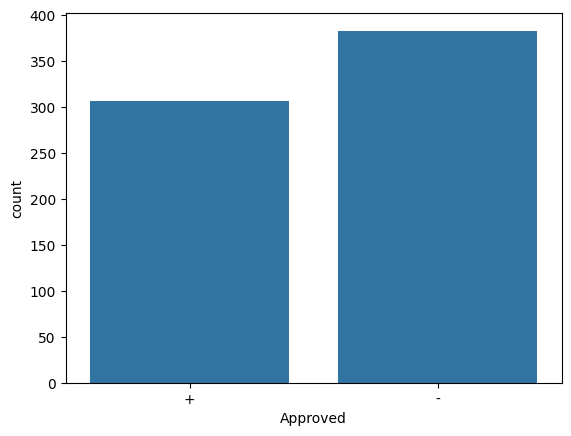

In [9]:
sns.countplot(data = dataset, x = 'Approved')

In [10]:
dataset.isnull().sum()

,0
Male,0
Age,0
Debt,0
Married,0
BankCustomer,0
EducationLevel,0
Ethnicity,0
YearsEmployed,0
PriorDefault,0
Employed,0


In [11]:
print("The shape of the data is: ", dataset.shape)

The shape of the data is:  (690, 16)


In [12]:
def replaceWithMode(df):
    """
    Replace missing values in categorical colums with their most frequent value
    """
    for col in df:
        if df[col].dtypes == 'object':
            df[col] = df[col].fillna(df[col].mode().iloc[0])
replaceWithMode(dataset)

In [13]:
dataset.isnull().sum()

,0
Male,0
Age,0
Debt,0
Married,0
BankCustomer,0
EducationLevel,0
Ethnicity,0
YearsEmployed,0
PriorDefault,0
Employed,0


In [14]:
# Using a label encoder to convert categorical colums into numeric types
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in dataset:
    if dataset[col].dtypes=='object':
        dataset[col]=le.fit_transform(dataset[col])

In [15]:
dataset.tail(15)

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
675,0,41.58,1.040,2,0,0,8,0.665,0,0,0,0,0,61,237,1
676,0,30.58,10.665,2,0,11,3,0.085,0,1,12,1,0,11,3,1
677,1,19.42,7.250,2,0,9,8,0.040,0,1,1,0,0,1,1,1
678,0,17.92,10.210,2,0,5,2,0.000,0,0,0,0,0,0,50,1
679,0,20.08,1.250,2,0,1,8,0.000,0,0,0,0,0,0,0,1
680,1,19.50,0.290,2,0,8,8,0.290,0,0,0,0,0,74,364,1
681,1,27.83,1.000,3,3,3,3,3.000,0,0,0,0,0,32,537,1
682,1,17.08,3.290,2,0,6,8,0.335,0,0,0,1,0,15,2,1
683,1,36.42,0.750,3,3,3,8,0.585,0,0,0,0,0,61,3,1
684,1,40.58,3.290,2,0,9,8,3.500,0,0,0,1,2,111,0,1


In [16]:
# The labeling in the dataset uses 0 and 1 to encode approved and declined users.
# Here we revert the values so that 1 denotes "approval", while 0 denotes "declined".
for idx, row in dataset.iterrows():
  if dataset.loc[idx, 'Approved'] == 0:
    dataset.loc[idx, 'Approved'] = 1
  elif dataset.loc[idx, 'Approved'] == 1:
    dataset.loc[idx, 'Approved'] = 0

In [17]:
# It can be shown that the labeling in the dataset uses 0 and 1 to encode having a prior default or not having one.
# The values are reverted below to achieve more intuitive labeling.
for idx, row in dataset.iterrows():
  if dataset.loc[idx, 'PriorDefault'] == 0:
    dataset.loc[idx, 'PriorDefault'] = 1
  elif dataset.loc[idx, 'PriorDefault'] == 1:
    dataset.loc[idx, 'PriorDefault'] = 0

In [20]:
dataset_df = pd.DataFrame(dataset)
dataset_df.to_csv('dataset_processed.csv', index=False)
dataset_df.head()

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,2,0,13,8,1.25,0,1,1,0,0,42,0,1
1,0,58.67,4.460,2,0,11,3,3.04,0,1,6,0,0,118,560,1
2,0,24.50,0.500,2,0,11,3,1.50,0,0,0,0,0,74,824,1
3,1,27.83,1.540,2,0,13,8,3.75,0,1,5,1,0,1,3,1
4,1,20.17,5.625,2,0,13,8,1.71,0,0,0,0,2,8,0,1


## Data Modeling

In [21]:
from sklearn.model_selection import train_test_split
# Removing the feature which are not important and converting to NumPy array
dataset = dataset.drop(['DriversLicense', 'ZipCode'], axis=1)
dataset = dataset.values

In [22]:
# Creating new variable to input features and labels
X,y = dataset[:,0:13] , dataset[:,13]

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.3,
                                random_state=123)

In [23]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Scaling X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

# Scaling X
rescaledX = scaler.transform(X)

In [24]:
# Note: Used for experimental purposes only to evaluate accuracy performance with and without scaling
rescaledX_train = X_train
rescaledX_test = X_test
rescaledX = X

# 2. Microsoft RAI Widgets





## Install Explainability Tools

In [25]:
!pip install --upgrade raiwidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.9/157.9 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.6/131.6

In [2]:
!pip install --upgrade interpret-community
from interpret.ext.blackbox import TabularExplainer

In [3]:
# Explainer Used: Mimic Explainer
from interpret.ext.blackbox import MimicExplainer
from interpret.ext.glassbox import LinearExplainableModel
from interpret.ext.glassbox import LGBMExplainableModel

In [4]:
import os

# Set the PYARROW_IGNORE_TIMEZONE environment variable
os.environ["PYARROW_IGNORE_TIMEZONE"] = "1"

# Now you can import and use the ErrorAnalysisDashboard
from raiwidgets import ErrorAnalysisDashboard

In [5]:
# Import metrics for evaluating the classifiers
from sklearn.metrics import accuracy_score, confusion_matrix

## Define Features and Check Their Dimensions

In [6]:
# Drop the DriversLicense and ZipCode features as they are not relevant to the problem
# features = dataset2.drop(['DriversLicense', 'ZipCode'], axis=1).columns
dataset2 = dataset2.drop(['DriversLicense', 'ZipCode'], axis=1)

NameError: name 'dataset2' is not defined

In [ ]:
# Drop the Approved class
dataset2 = dataset2.drop(['Approved'], axis=1)

In [ ]:
# Retrieve the names of the features
features = dataset2.columns

In [ ]:
# List the features
features

In [ ]:
# Verify the dimension of the features variable
features.shape

In [ ]:
classes = ['Declined', 'Approved']

## Define the XGBoost Classifier

In [ ]:
# Import the XGBoost classifier
!pip install xgboost
from xgboost import XGBClassifier

In [ ]:
# Define the XGBoost model
xgb_model = XGBClassifier(max_depth=12,
                      n_estimators=250,
                      min_child_weight=8,
                      subsample=0.8,
                      learning_rate =0.02,
                      seed=42)

In [ ]:
# Fit the XGBoost model
xgb_model.fit(rescaledX_train, y_train)

In [ ]:
# Make predictions based on the XGBoost model
y_pred_xgb = xgb_model.predict(rescaledX_test)

In [ ]:
# Print the accuracy score for the XGBoost model
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_pred_xgb)))

## Define the Explainer for XGBoost

In [ ]:
explainer_xgb = TabularExplainer(xgb_model,
                             rescaledX_train,
                             features=features,
                             classes=classes)

In [ ]:
global_explanation_xgb = explainer_xgb.explain_global(rescaledX_test)

**Check** X_train and X_test shapes before the experiment

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
categorical_features = ['Male', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'PriorDefault', 'Employed']

In [ ]:
# Start the error analysis dashboard for XGBoost
# ErrorAnalysisDashboard(global_explanation_xgb, dataset=rescaledX_test, true_y=y_test, categorical_features=categorical_features, pred_y=y_pred_xgb)
ErrorAnalysisDashboard(global_explanation_xgb, xgb_model, dataset=rescaledX_test, true_y=y_test, categorical_features=categorical_features)

In [ ]:
from raiwidgets import ExplanationDashboard

In [ ]:
ExplanationDashboard(global_explanation_xgb, xgb_model, dataset=rescaledX_test, true_y=y_test)

Saving the datasets (needed to explain the decisions for applicants)

In [ ]:
X_tr = pd.DataFrame(X_train, columns = features)

In [ ]:
X_tr['Decision'] = y_train

In [ ]:
# X_tr.to_csv('/content/train_data.csv', index=False)
X_tr.to_csv('train_data.csv', index=False)

In [ ]:
X_te = pd.DataFrame(X_test, columns = features)

In [ ]:
X_te['Decision'] = y_test

In [ ]:
X_te['Prediction'] = y_pred_xgb

In [ ]:
# X_te.to_csv('/content/test_data.csv', index=False)
X_te.to_csv('test_data.csv', index=False)

In [ ]:
X_te[X_te['Prediction'] != X_te['Decision']]

In [ ]:
X_te[(X_te['Income'] != 0) & (X_te['Prediction'] != X_te['Decision'])]

# 3. SHAP

## Define SHAP Explainer for XGBoost

In [ ]:
# Import SHAP
import shap

In [ ]:
# Define SHAP explainer based on XGBoost
xgb_explainer = shap.Explainer(xgb_model, feature_names=features)

In [ ]:
# Function for plotting absolute values of SHAP
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)

    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')

    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(10,12),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")

In [ ]:
# Define SHAP values
shap_values = xgb_explainer(rescaledX_train)

In [ ]:
# Retrieve SHAP values
shap_values[:,2]

In [ ]:
# Check type of explainer
type(xgb_explainer)

## SHAP Plots to Explain XGBoost

In [ ]:
# Scatter plot
shap.plots.scatter(shap_values[:,2], color=shap_values)

In [ ]:
# Waterfall plot
shap.waterfall_plot(shap_values[0], max_display=13)

In [ ]:
# Beeswarm plot
shap.plots.beeswarm(shap_values, max_display=13)

In [ ]:
# Bar plot
shap.plots.bar(shap_values, max_display=13)

In [ ]:
# Summary plot
shap.summary_plot(shap_values = shap_values, features = rescaledX_train, plot_type='bar', max_display=13)

In [ ]:
# Absolute values plot
input_data = pd.DataFrame(rescaledX_train, columns=features)
ABS_SHAP(shap_values.values, input_data)

# 4. Analysis of Selected Samples

In [ ]:
X_te.isna().sum().sum()

## Case 1: Both bank and model approved credit card request

In [ ]:
# List all applicants with non-zero income where both the bank and model approved the credit card request
X_te[(X_te['Income'] != 0) & (X_te['Decision'] == 1) & (X_te['Prediction'] == 1)].iloc[:,:]

In [ ]:
# Select an applicant for Case 1 based on the above tabular results
index1 = 1

In [ ]:
# Display the feature values for the selected applicant
X_te.iloc[index1,:]

In [ ]:
v = X_te.iloc[index1,:13].values

In [ ]:
v

In [ ]:
shap_values_approved = xgb_explainer([v])

In [ ]:
shap_values_approved

In [ ]:
# Waterfall plot
shap.waterfall_plot(shap_values_approved[0], max_display=13)

## Case 2: Both bank and model declined the credit card request

In [ ]:
# List all applicants with non-zero income where both the bank and model declined the credit card request
X_te[(X_te['Income'] != 0) & (X_te['Decision'] == 0) & (X_te['Prediction'] == 0)].iloc[:,:]

In [ ]:
# Select an applicant for Case 2 based on the above tabular results
index2 = 2

In [ ]:
# Display the feature values for the selected applicant
X_te.iloc[index2,:]

In [ ]:
v = X_te.iloc[index2,:13].values

In [ ]:
v

In [ ]:
shap_values_declined = xgb_explainer([v])

In [ ]:
shap_values_declined

In [ ]:
# Waterfall plot
shap.waterfall_plot(shap_values_declined[0], max_display=13)

## Case 3: Bank approved credit card request, while model rejected it

In [ ]:
# List all applicants for which the bank approved their credit card request, while the model rejected it
X_te[(X_te['Decision'] == 1) & (X_te['Prediction'] == 0)].iloc[:,:]

In [ ]:
# Select an applicant for Case 3 based on the above tabular results
index3 = 101

In [ ]:
# Display the feature values for the selected applicant
X_te.iloc[index3,:]

In [ ]:
v = X_te.iloc[index3,:13].values

In [ ]:
v

In [ ]:
shap_values_approved_declined = xgb_explainer([v])

In [ ]:
shap_values_approved_declined

In [ ]:
# Waterfall plot
shap.waterfall_plot(shap_values_approved_declined[0], max_display=13)

## Case 4: Bank rejected credit card request, while model approved it

In [ ]:
# List all applicants for which the bank rejected their credit card request, while the model approved it
X_te[(X_te['Decision'] == 0) & (X_te['Prediction'] == 1)].iloc[:,:]

In [ ]:
# Select an applicant for Case 4 based on the above tabular results
index4 = 166

In [ ]:
# Display the feature values for the selected applicant
X_te.iloc[index4,:]

In [ ]:
v = X_te.iloc[index4,:13].values

In [ ]:
v

In [ ]:
shap_values_declined_approved = xgb_explainer([v])

In [ ]:
shap_values_declined_approved

In [ ]:
# Waterfall plot
shap.waterfall_plot(shap_values_declined_approved[0], max_display=13)